In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

In [2]:
file = '../Training_Batch_Files/adultCensus_20230602_010222.csv'

In [3]:
df = pd.read_csv(file)

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.shape

(32561, 15)

In [6]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

In [7]:
df.dtypes.index

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [8]:
df.dtypes.values

array([dtype('int64'), dtype('O'), dtype('int64'), dtype('O'),
       dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('O'), dtype('O')], dtype=object)

In [9]:
dict(zip(df.dtypes.index,df.dtypes.values))

{'age': dtype('int64'),
 'workclass': dtype('O'),
 'fnlwgt': dtype('int64'),
 'education': dtype('O'),
 'education-num': dtype('int64'),
 'marital-status': dtype('O'),
 'occupation': dtype('O'),
 'relationship': dtype('O'),
 'race': dtype('O'),
 'sex': dtype('O'),
 'capital-gain': dtype('int64'),
 'capital-loss': dtype('int64'),
 'hours-per-week': dtype('int64'),
 'country': dtype('O'),
 'salary': dtype('O')}

In [10]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [11]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [12]:
numerical = df.select_dtypes(include=['int64'])
categorical = df.select_dtypes(include=['O'])

In [13]:
print(numerical.shape,categorical.shape)

(32561, 6) (32561, 9)


In [16]:
for i in categorical.columns:
    print(i, df[i].nunique(),'\n', df[i].unique(),'\n')

workclass 9 
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

education 16 
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

marital-status 7 
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

occupation 15 
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv'] 

relationship 6 
 [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 

race 5 
 [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'] 

sex 2 
 [' Male' ' Female'] 

country 42 
 [' Un

In [17]:
for i in categorical.columns:
    print(i,df[i].nunique(),'\n', df[i].value_counts(),'\n')

workclass 9 
  Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 

education 16 
  HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64 

marital-status 7 
  Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64 

occupation 15 
 

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# # checking the distribution of numerical features
# plt.figure(figsize=(20,25), facecolor='white')
# plotnumber = 1
# for column in numerical:
#      if plotnumber<=6:
#             ax = plt.subplot(3,2,plotnumber)
#             sns.displot(df[column])
#             plt.xlabel(column,fontsize=20)
#             plotnumber+=1
# plt.tight_layout()         

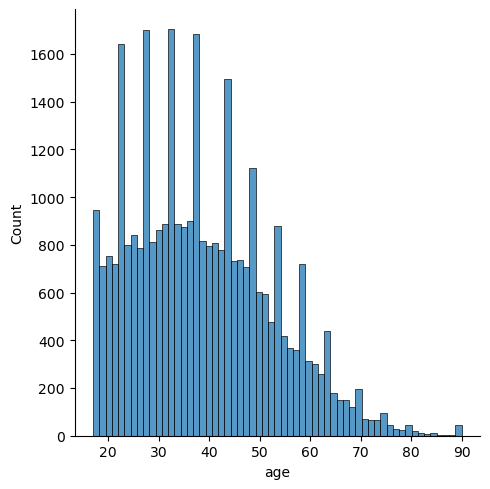

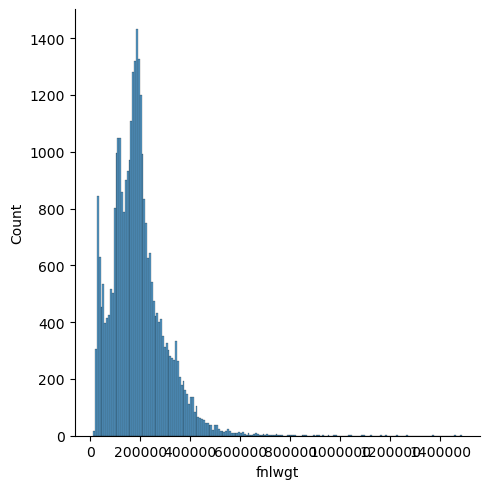

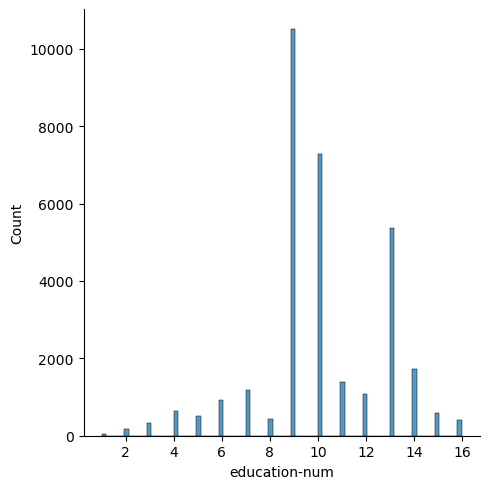

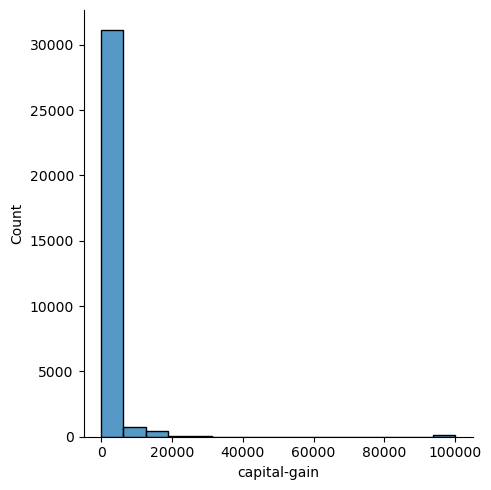

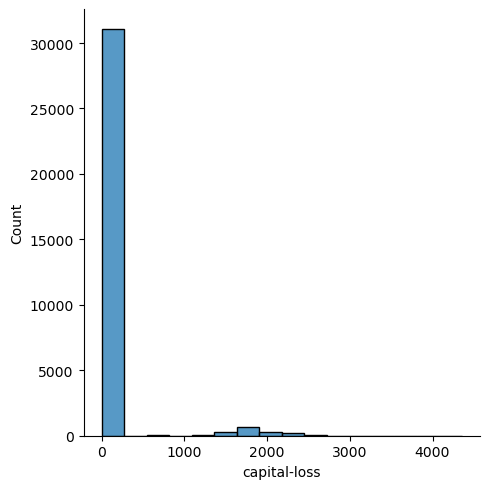

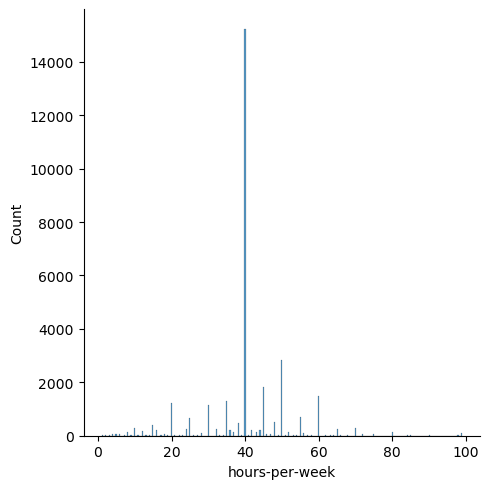

In [18]:
for col in numerical:
    print(sns.displot(df[col]))

In [36]:
q = df['age'].quantile(0.9)
df_cleaned = df[df['age']<q]

q = df_cleaned['fnlwgt'].quantile(0.9)
df_cleaned = df_cleaned[df_cleaned['fnlwgt']<q]

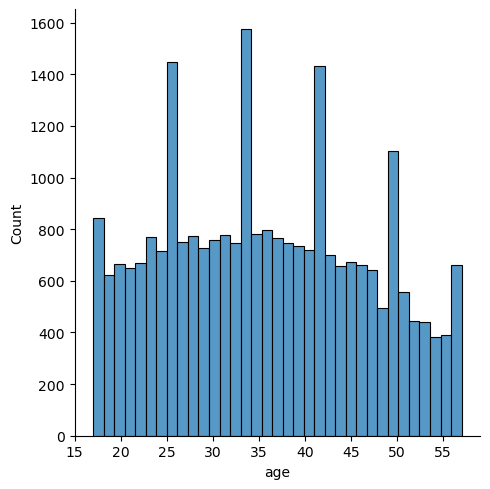

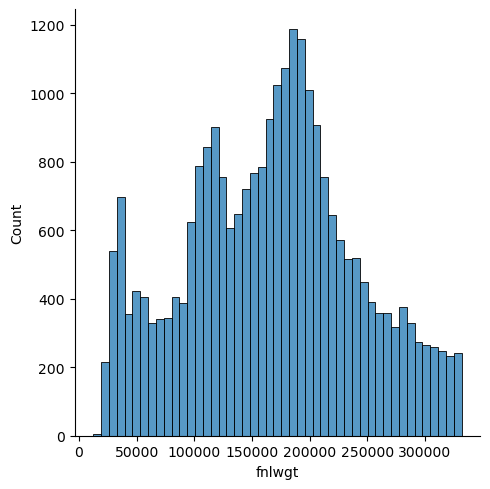

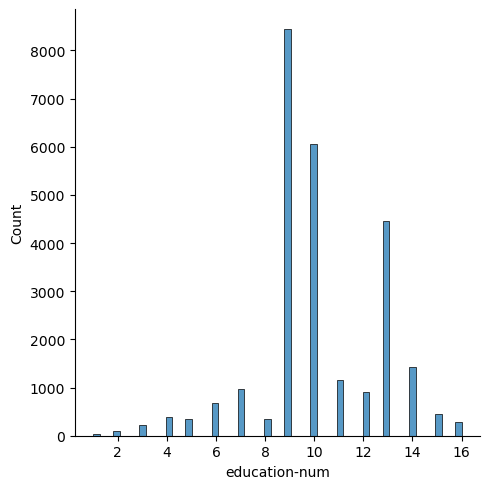

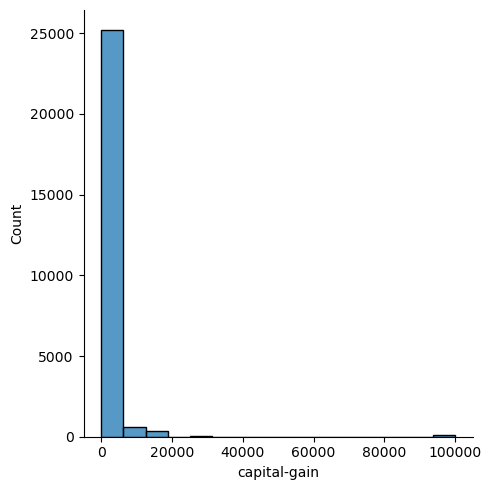

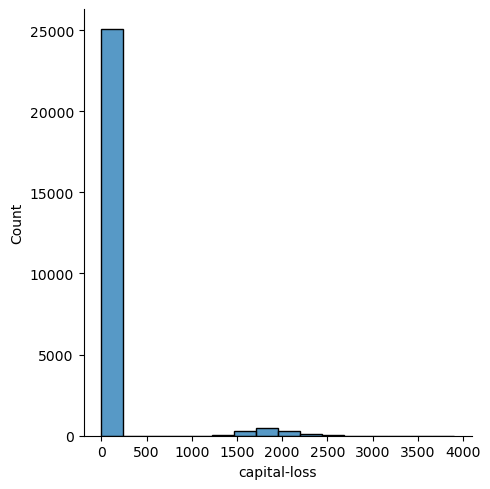

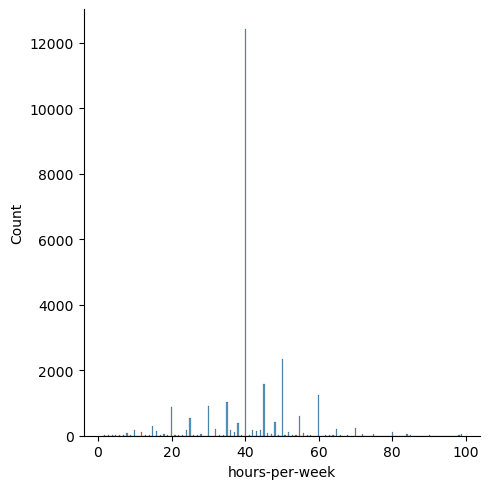

In [37]:
for col in numerical:
    print(sns.displot(df_cleaned[col]))

In [38]:
print(df.shape, df_cleaned.shape)

(32561, 15) (26276, 15)


In [40]:
# from sklearn.preprocessing import StandardScaler
# scalar = StandardScaler()
# numerical_scaled = scalar.fit_transform(df_cleaned)

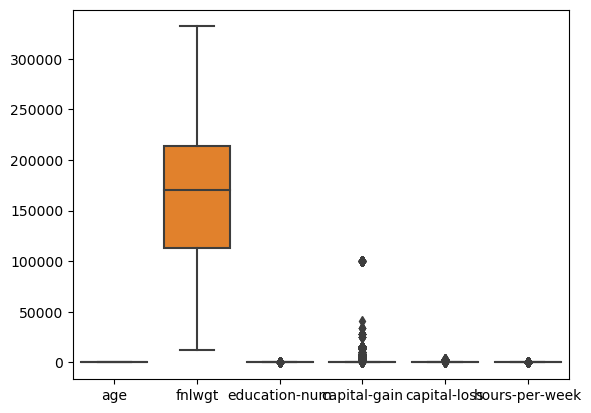

In [41]:
sns.boxplot(df_cleaned)

In [44]:
df_cleaned.salary.value_counts()

 <=50K    20034
 >50K      6242
Name: salary, dtype: int64

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [46]:
df_cleaned['sal_trans'] = le.fit_transform(df_cleaned['salary'])

In [48]:
df_cleaned['sal_trans'].value_counts()

0    20034
1     6242
Name: sal_trans, dtype: int64

In [49]:
df_cleaned.drop(columns=['salary'], inplace=True)

In [50]:
round(df_cleaned.shape[0]/2)

13138

In [51]:
class_0 = df_cleaned[df_cleaned['sal_trans']==0]
class_1 = df_cleaned[df_cleaned['sal_trans']==1]

In [52]:
print(len(class_0), len(class_1))

20034 6242


In [53]:
class_1_upsampled = resample(class_1,
                          replace=True, # sample with replacement
                          n_samples=round(df_cleaned.shape[0]/2), # create half of the dataset
                          random_state=27) # reproducible results

In [54]:
class_0_downsampled = resample(class_0,
                          replace=True, # sample with replacement
                          n_samples=round(df_cleaned.shape[0]/2), # create half of the dataset
                          random_state=27) # reproducible results

In [55]:
data_balanced = pd.concat([class_0_downsampled,class_1_upsampled])

In [56]:
data_balanced

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,sal_trans
8352,17,Private,114420,11th,7,Never-married,Sales,Own-child,White,Female,0,0,30,United-States,0
6404,20,Self-emp-inc,95997,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,70,United-States,0
24143,40,Private,34113,HS-grad,9,Never-married,Exec-managerial,Not-in-family,Amer-Indian-Eskimo,Male,6849,0,43,United-States,0
7910,29,Private,183887,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,0
25779,29,Private,166210,HS-grad,9,Divorced,Handlers-cleaners,Own-child,White,Male,0,0,50,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,45,Self-emp-inc,151584,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,35,United-States,1
16864,42,Private,54202,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,10520,0,50,United-States,1
30852,54,Private,174102,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
28642,30,Local-gov,131568,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1


In [59]:
data_balanced.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,sal_trans
count,26276.000000,26276.000000,26276.000000,26276.000000,26276.000000,26276.000000,26276.00000
mean,37.885903,165658.792739,10.671335,1801.574098,125.254415,42.689412,0.50000
std,10.328441,73057.858296,2.523689,9475.997578,479.465050,11.497825,0.50001
min,17.000000,12285.000000,1.000000,0.000000,0.000000,1.000000,0.00000
25%,30.000000,112840.000000,9.000000,0.000000,0.000000,40.000000,0.00000
50%,38.000000,169104.000000,10.000000,0.000000,0.000000,40.000000,0.50000
75%,46.000000,210797.000000,13.000000,0.000000,0.000000,50.000000,1.00000
max,57.000000,331875.000000,16.000000,99999.000000,3900.000000,99.000000,1.00000


In [60]:
# shuffle the DataFrame rows
data_balanced = data_balanced.sample(frac = 1)

In [61]:
data_balanced= data_balanced.reset_index(drop=True)

In [62]:
# data_balanced.drop(columns=[0], axis=1)
data_balanced

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,sal_trans
0,38,Private,189623,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1887,40,United-States,1
1,31,Self-emp-inc,133861,Assoc-voc,11,Divorced,Sales,Not-in-family,White,Male,0,0,40,United-States,0
2,44,Federal-gov,281739,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Male,13550,0,50,United-States,1
3,48,Private,210424,HS-grad,9,Separated,Adm-clerical,Unmarried,White,Female,914,0,40,United-States,0
4,26,Local-gov,72594,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,55,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26271,31,Self-emp-not-inc,181485,Bachelors,13,Never-married,Sales,Not-in-family,Black,Male,0,0,40,United-States,1
26272,39,Private,318416,10th,6,Separated,Other-service,Own-child,Black,Female,0,0,12,United-States,0
26273,25,Private,126133,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
26274,43,Private,196545,Bachelors,13,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,1902,40,United-States,1


In [63]:
df2 = data_balanced.copy()
cat2 = df2.select_dtypes(include=['O'])
for col in cat2.columns:
    df2[col] = le.fit_transform(df2[col])

In [64]:
df2

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,sal_trans
0,38,4,189623,9,13,2,10,0,4,1,0,1887,40,38,1
1,31,5,133861,8,11,0,12,1,4,1,0,0,40,38,0
2,44,1,281739,15,10,4,1,1,4,1,13550,0,50,38,1
3,48,4,210424,11,9,5,1,4,4,0,914,0,40,38,0
4,26,2,72594,15,10,2,11,0,4,1,0,0,55,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26271,31,6,181485,9,13,4,12,1,2,1,0,0,40,38,1
26272,39,4,318416,0,6,5,8,3,2,0,0,0,12,38,0
26273,25,4,126133,15,10,4,8,3,4,0,0,0,40,38,0
26274,43,4,196545,9,13,2,7,0,4,1,0,1902,40,38,1


In [65]:
X = df2.drop(columns=['sal_trans'])
y = df2['sal_trans']

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=30)

In [82]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)

In [84]:
X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [86]:
X_train_scaled_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,1.174384,0.042545,-0.133423,-1.023464,0.532819,-0.319578,0.050442,-0.754286,0.374521,0.618395,-0.189591,-0.258243,0.631775,0.286757
1,-1.147839,2.248922,0.054648,0.413724,1.333385,1.208565,0.775643,-0.150141,0.374521,-1.617089,-0.189591,-0.258243,-0.233219,0.286757
2,0.690588,0.042545,-0.536894,-0.448589,0.933102,-0.319578,-0.674759,-0.754286,0.374521,0.618395,-0.189591,-0.258243,-0.233219,0.286757
3,-1.147839,0.042545,-1.041215,-0.448589,0.933102,1.208565,1.259110,-0.150141,0.374521,0.618395,-0.189591,-0.258243,-0.233219,0.286757
4,-1.147839,0.042545,0.156472,1.276037,-0.267748,-0.319578,1.259110,-0.754286,0.374521,0.618395,-0.189591,-0.258243,-0.233219,0.286757


In [89]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(random_state=6)

In [90]:
rand_clf.fit(X_train_scaled_df,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

In [91]:
X_test_scaled = scalar.fit_transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [92]:
rand_clf.score(X_test_scaled_df,y_test)

0.924521121400482

In [96]:

# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
 "n_estimators" : [100],
 'criterion': ['gini', 'entropy'],
 'max_depth' : range(2,20,1),
 'min_samples_leaf' : range(1,10,1),
 'min_samples_split': range(2,10,1),
 }


In [97]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [98]:
grid_search.fit(X_train_scaled_df,y_train)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.2min


KeyboardInterrupt: 